In [17]:
# ruff: noqa
# mypy: ignore-errors

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pickle
import matplotlib.pyplot as plt
from task_examples.string_pager_widget import StringPager

In [19]:
RESULTS_FILE = "bbh_optimized_prompts_20251119065500.pkl"

with open(RESULTS_FILE, "rb") as f:
    bbh_results = pickle.load(f)

In [20]:
def iteration_to_str(results):
    output_list = []
    for iteration, ins_list in results.instructions_at_iteration_n.items():
        output = f"Iteration: {iteration}\n"
        for i, ins in enumerate(ins_list):
            output += "-" * 40
            output += f"\nInstruction: {i + 1}\n\n"
            output += ins.instruction + "\n"
            output += f"\nTrain Score: {results.scored_instructions[ins].score}\n"

        output_list.append(output)
    return output_list

In [21]:
instruction_str = iteration_to_str(bbh_results)

StringPager(instruction_str).display()

In [22]:
def collect_score_per_iteration(results):
    avg_score = []
    max_score = []
    for ins_list in results.instructions_at_iteration_n.values():
        iteration_score = []
        for ins in ins_list:
            iteration_score.append(results.scored_instructions[ins].score)
        avg_score.append(sum(iteration_score) / len(iteration_score))
        max_score.append(max(iteration_score))
    return avg_score, max_score

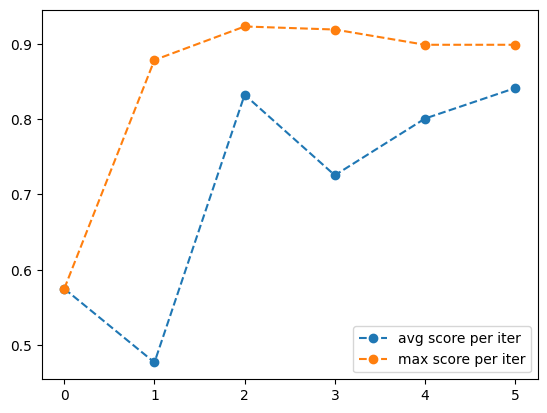

In [23]:
avg_score_per_iter, max_score_per_iter = collect_score_per_iteration(bbh_results)


plt.plot(avg_score_per_iter, marker="o", linestyle="--", label="avg score per iter")
plt.plot(max_score_per_iter, marker="o", linestyle="--", label="max score per iter")
plt.legend()
plt.show()

In [24]:
ins, score = bbh_results.best_validation_instruction

print(ins.instruction)
print(f"\nValidation Score: ", score.score)

Carefully read the user question and all provided context excerpts. For each excerpt, check if it contains a direct, explicit answer to the question—such as a specific name, date, or fact. If at least one excerpt provides a clear and unambiguous answer, select "Yes"; if none do, select "No".

Validation Score:  0.943089430894309
